In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_time_series = pd.read_csv('./CSV/df_time_series_2023.csv')
df_time_series.head()

,Unnamed: 0,index,code,name,decimal_digits,name_plural,rounding,symbol,symbol_native,ARS,...,XRP,YER,ZAR,ZMK,ZMW,ZWL,date,USDT,USDC,BUSD
0,0,5,ARS,Argentine Peso,2,Argentine pesos,0,AR$,$,1.0,...,0.001994,0.311879,0.022791,11.218591,0.031044,7.348330,2023-12-16T23:59:00.000Z,NaN,NaN,NaN
1,1,5,ARS,Argentine Peso,2,Argentine pesos,0,AR$,$,1.0,...,0.002008,0.311879,0.022791,11.218592,0.031044,7.348327,2023-12-15T23:59:00.000Z,NaN,NaN,NaN
2,2,5,ARS,Argentine Peso,2,Argentine pesos,0,AR$,$,1.0,...,0.001974,0.312098,0.022887,11.242760,0.030843,7.357599,2023-12-14T23:59:00.000Z,NaN,NaN,NaN
3,3,5,ARS,Argentine Peso,2,Argentine pesos,0,AR$,$,1.0,...,0.001986,0.312287,0.023283,11.250072,0.030643,7.349614,2023-12-13T23:59:00.000Z,NaN,NaN,NaN
4,4,5,ARS,Argentine Peso,2,Argentine pesos,0,AR$,$,1.0,...,0.004377,0.681693,0.051677,24.566168,0.066840,15.878391,2023-12-12T23:59:00.000Z,NaN,NaN,NaN


In [3]:
list(df_time_series.columns)

['Unnamed: 0',
 'index',
 'code',
 'name',
 'decimal_digits',
 'name_plural',
 'rounding',
 'symbol',
 'symbol_native',
 'ARS',
 'ADA',
 'AED',
 'AFN',
 'ALL',
 'AMD',
 'ANG',
 'AOA',
 'ARB',
 'AUD',
 'AWG',
 'AZN',
 'BAM',
 'BBD',
 'BDT',
 'BGN',
 'BHD',
 'BIF',
 'BMD',
 'BNB',
 'BND',
 'BOB',
 'BRL',
 'BSD',
 'BTC',
 'BTN',
 'BWP',
 'BYN',
 'BYR',
 'BZD',
 'CAD',
 'CDF',
 'CHF',
 'CLF',
 'CLP',
 'CNY',
 'COP',
 'CRC',
 'CUC',
 'CUP',
 'CVE',
 'CZK',
 'DAI',
 'DJF',
 'DKK',
 'DOP',
 'DOT',
 'DZD',
 'EGP',
 'ERN',
 'ETB',
 'ETH',
 'EUR',
 'FJD',
 'FKP',
 'GBP',
 'GEL',
 'GGP',
 'GHS',
 'GIP',
 'GMD',
 'GNF',
 'GTQ',
 'GYD',
 'HKD',
 'HNL',
 'HRK',
 'HTG',
 'HUF',
 'IDR',
 'ILS',
 'IMP',
 'INR',
 'IQD',
 'IRR',
 'ISK',
 'JEP',
 'JMD',
 'JOD',
 'JPY',
 'KES',
 'KGS',
 'KHR',
 'KMF',
 'KPW',
 'KRW',
 'KWD',
 'KYD',
 'KZT',
 'LAK',
 'LBP',
 'LKR',
 'LRD',
 'LSL',
 'LTC',
 'LTL',
 'LVL',
 'LYD',
 'MAD',
 'MDL',
 'MGA',
 'MKD',
 'MMK',
 'MNT',
 'MOP',
 'MRO',
 'MUR',
 'MVR',
 'MWK',
 'MXN',


In [4]:
columns_to_drop = ['Unnamed: 0','index','decimal_digits','name_plural','rounding','symbol_native','ADA','AED','AFN',
                     'ALL','AMD','ANG','AOA','ARB','AUD','AWG','AZN','BAM','BBD','BDT','BGN','BHD','BIF','BMD','BNB',
                     'BND','BOB','BRL','BTN','BWP','BYN','BYR','BZD','CAD','CDF','CHF','CLF','CLP','CNY','COP','CRC','CUC',
                     'CUP','CVE','CZK','DAI','DJF','DKK','DOP','DOT','DZD','EGP','ERN','ETB','FJD','FKP','GBP','GEL','GGP',
                     'GHS','GIP','GMD','GNF','GTQ','GYD','HKD','HNL','HRK','HTG','HUF','IDR','ILS','IMP','INR','IQD','IRR',
                     'ISK','JEP','JMD','JOD','JPY','KES','KGS','KHR','KMF','KPW','KRW','KWD','KYD','KZT','LAK','LBP','LKR',
                     'LRD','LSL','LTC','LTL','LVL','LYD','MAD','MDL','MGA','MKD','MMK','MNT','MOP','MRO','MUR','MVR','MWK',
                     'MXN','MYR','MZN','NAD','NGN','NIO','NOK','NPR','NZD','OMR','OP','PAB','PEN','PGK','PHP','PKR','PLN',
                     'PYG','QAR','RON','RSD','RUB','RWF','SAR','SBD','SCR','SDG','SEK','SGD','SHP','SLL','SOL','SOS','SRD',
                     'STD','SVC','SYP','SZL','THB','TJS','TMT','TND','TOP','TRY','TTD','TWD','TZS','UAH','UGX','UYU','UZS',
                     'VEF','VND','VUV','WST','XAF','XAG','XAU','XCD','XDR','XOF','XPD','XPF','XPT','XRP','YER','ZAR','ZMK',
                     'ZMW','ZWL','USDT','USDC','BUSD', 'ETH', 'BSD']

columns_to_drop_present = set(columns_to_drop).intersection(df_time_series.columns)
if columns_to_drop_present:
    df_time_series.drop(columns=columns_to_drop_present, axis=1, inplace=True)

In [5]:
def add_period(row):
    date = row['date']
    return date[0:10], date[0:7]

In [6]:
df_time_series['date'], df_time_series['period'] = zip(*df_time_series.apply(add_period, axis=1))
df_time_series

,code,name,symbol,ARS,BTC,EUR,USD,date,period
0,ARS,Argentine Peso,AR$,1.000000,2.900000e-08,0.001144,0.001246,2023-12-16,2023-12
1,ARS,Argentine Peso,AR$,1.000000,3.000000e-08,0.001144,0.001246,2023-12-15,2023-12
2,ARS,Argentine Peso,AR$,1.000000,2.900000e-08,0.001136,0.001249,2023-12-14,2023-12
3,ARS,Argentine Peso,AR$,1.000000,2.900000e-08,0.001148,0.001250,2023-12-13,2023-12
4,ARS,Argentine Peso,AR$,1.000000,6.600000e-08,0.002526,0.002729,2023-12-12,2023-12
...,...,...,...,...,...,...,...,...,...
3427,USD,US Dollar,$,178.909824,5.900000e-05,0.950401,NaN,2023-01-05,2023-01
3428,USD,US Dollar,$,178.571917,5.900000e-05,0.942652,NaN,2023-01-04,2023-01
3429,USD,US Dollar,$,178.380409,6.000000e-05,0.948182,NaN,2023-01-03,2023-01
3430,USD,US Dollar,$,178.152844,6.000000e-05,0.936562,NaN,2023-01-02,2023-01


In [7]:
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    3432 non-null   object 
 1   name    3432 non-null   object 
 2   symbol  3432 non-null   object 
 3   ARS     2495 non-null   float64
 4   BTC     2495 non-null   float64
 5   EUR     2495 non-null   float64
 6   USD     2286 non-null   float64
 7   date    3432 non-null   object 
 8   period  3432 non-null   object 
dtypes: float64(4), object(5)
memory usage: 241.4+ KB


In [8]:
df_time_series.describe()

,ARS,BTC,EUR,USD
count,2.495000e+03,2.495000e+03,2495.000000,2286.000000
mean,1.064533e+06,1.342914e-01,3519.412577,4150.706349
std,3.025568e+06,3.280040e-01,8791.289191,9857.099574
min,1.000000e+00,2.900000e-08,0.001136,0.001246
25%,7.023332e+01,9.104000e-06,0.209026,0.205404
50%,2.525787e+02,3.753810e-05,0.955220,1.070977
75%,2.103154e+05,3.348452e-02,722.560668,1592.607380
max,3.444543e+07,1.000000e+00,41125.341057,44262.672403


In [9]:
df_time_series.isnull().sum()

code         0
name         0
symbol       0
ARS        937
BTC        937
EUR        937
USD       1146
date         0
period       0
dtype: int64

array([[<Axes: title={'center': 'ARS'}>, <Axes: title={'center': 'BTC'}>],
       [<Axes: title={'center': 'EUR'}>, <Axes: title={'center': 'USD'}>]],
      dtype=object)

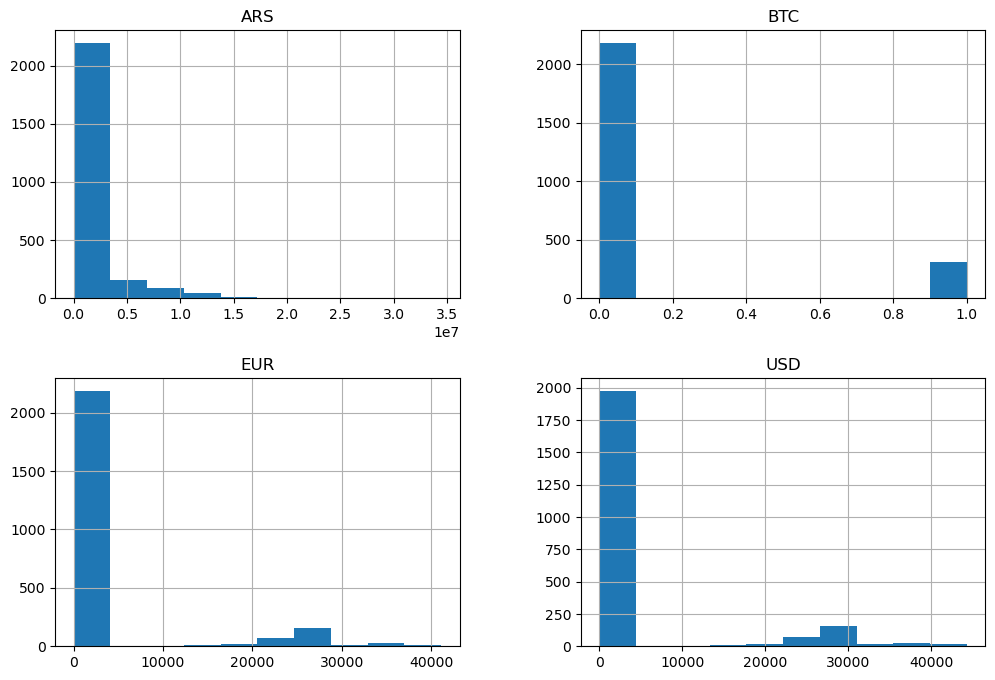

In [10]:
df_time_series.hist(figsize=(12,8))

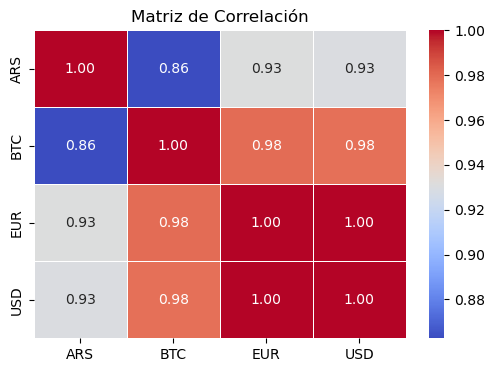

In [11]:
df_time_series_numeric_vars = df_time_series.select_dtypes(include=['int64', 'float64'])
correlation_df_time_series = df_time_series_numeric_vars.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df_time_series, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [12]:
df_time_series_USD = df_time_series[df_time_series.code == 'USD']
df_time_series_USD

,code,name,symbol,ARS,BTC,EUR,USD,date,period
3120,USD,US Dollar,$,802.346727,0.000024,0.917590,1.0,2023-12-16,2023-12
3121,USD,US Dollar,$,802.346701,0.000024,0.917590,1.0,2023-12-15,2023-12
3122,USD,US Dollar,$,800.621941,0.000023,0.909490,1.0,2023-12-14,2023-12
3123,USD,US Dollar,$,800.101515,0.000023,0.918800,1.0,2023-12-13,2023-12
3124,USD,US Dollar,$,366.406359,0.000024,0.925560,1.0,2023-12-12,2023-12
...,...,...,...,...,...,...,...,...,...
3427,USD,US Dollar,$,178.909824,0.000059,0.950401,NaN,2023-01-05,2023-01
3428,USD,US Dollar,$,178.571917,0.000059,0.942652,NaN,2023-01-04,2023-01
3429,USD,US Dollar,$,178.380409,0.000060,0.948182,NaN,2023-01-03,2023-01
3430,USD,US Dollar,$,178.152844,0.000060,0.936562,NaN,2023-01-02,2023-01


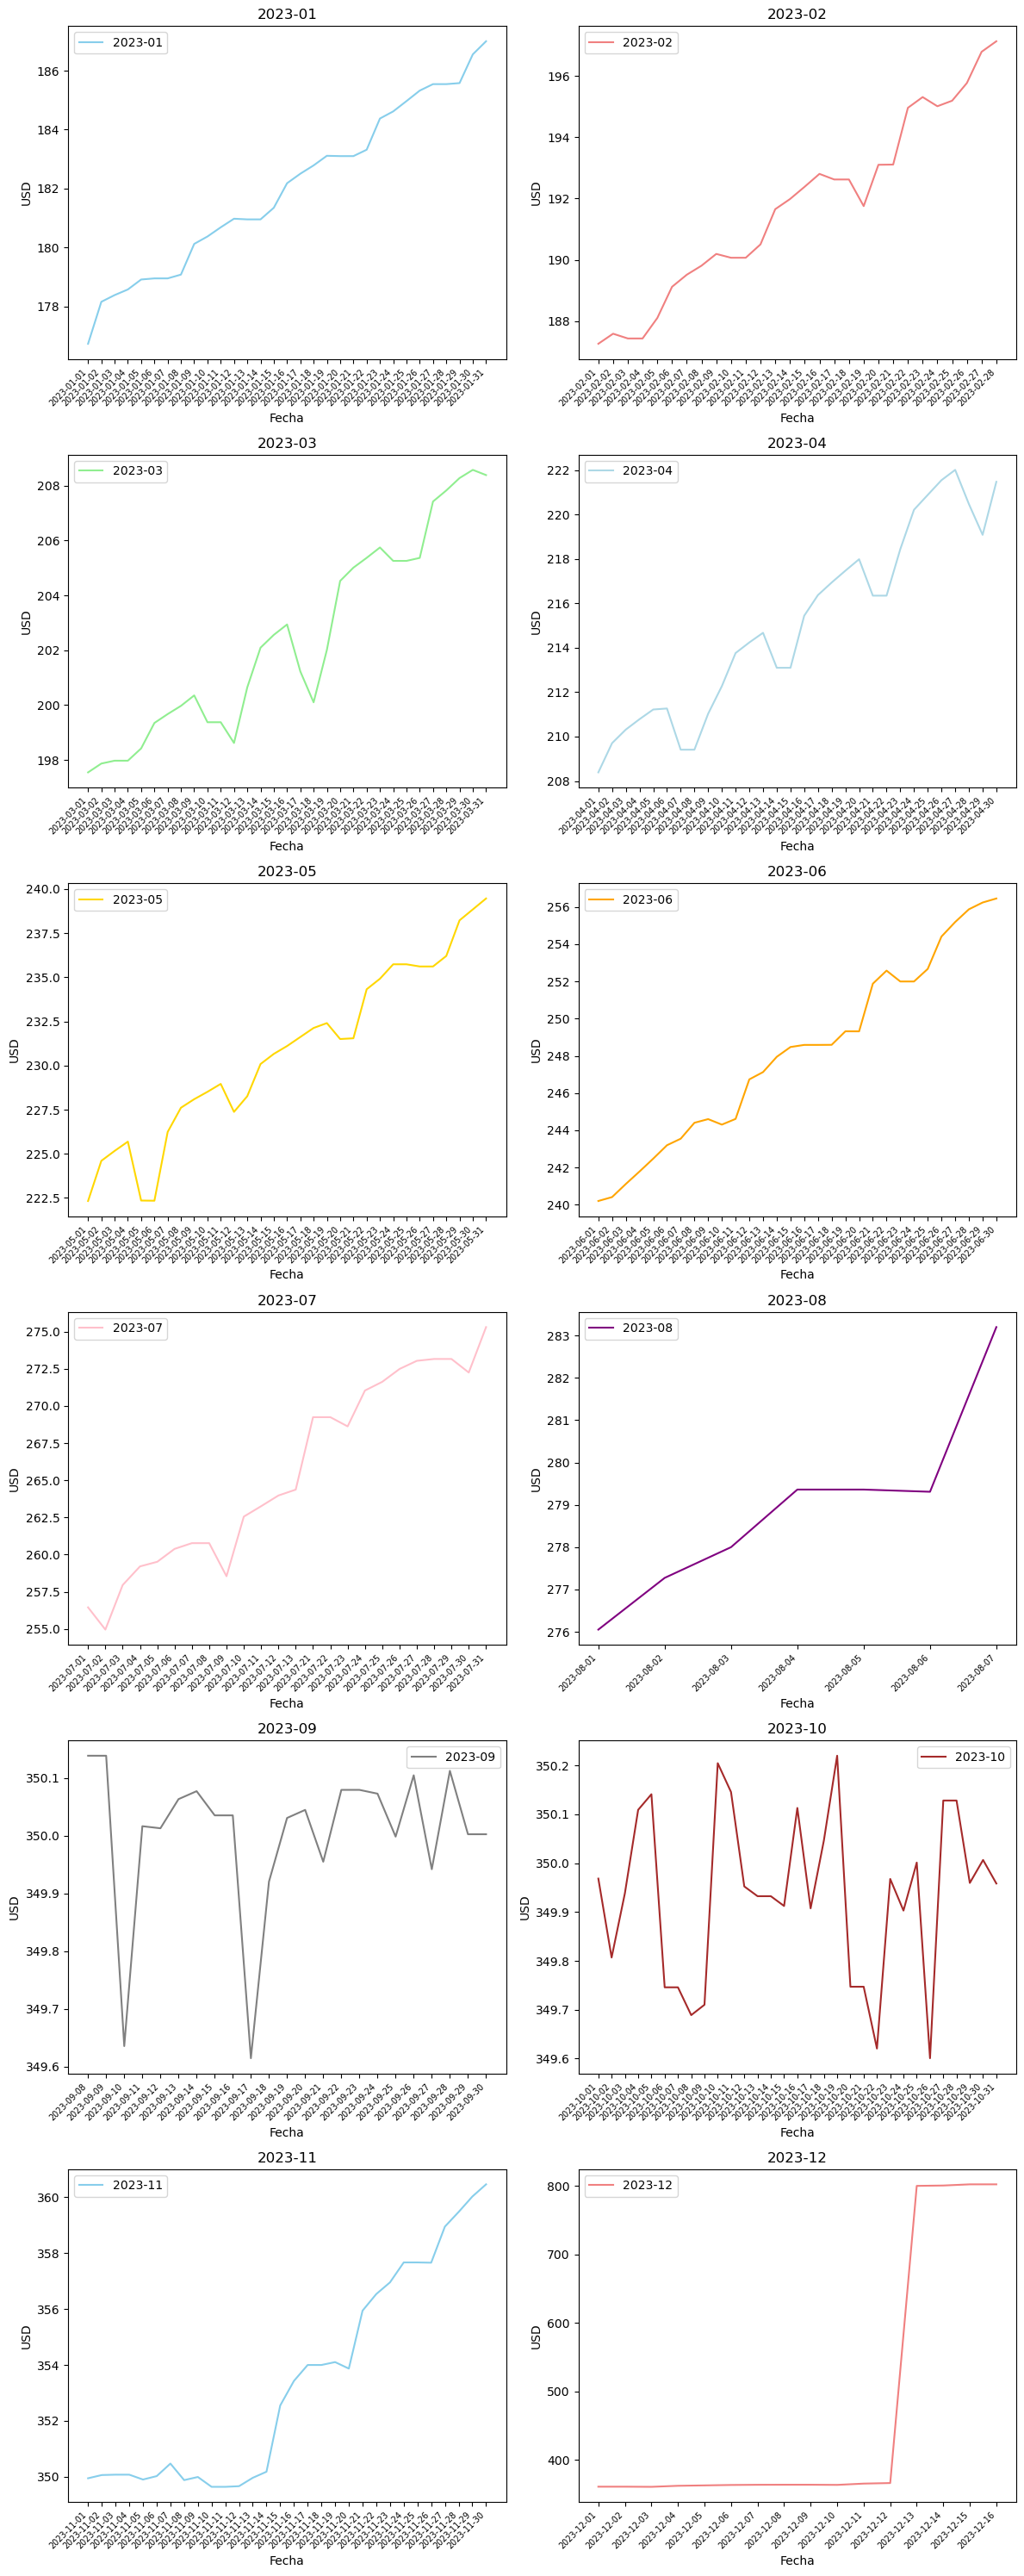

In [16]:
df_time_series_USD = df_time_series[df_time_series.code == 'USD']
unique_periods = sorted(df_time_series_USD['period'].unique())
n_filas = len(unique_periods) // 2
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(12, 30))

for i, period in enumerate(unique_periods):
    row = i // n_columnas
    col = i % n_columnas
    data = df_time_series_USD[df_time_series_USD['period'] == period].sort_values('date', ascending=True)
    date = data['date']
    ARS = data['ARS']
    colores = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'gold', 'orange', 'pink', 'purple', 'gray', 'brown']

    axs[row, col].plot(date, ARS, label=period, color=colores[i % len(colores)])
    axs[row, col].set_title(period)
    axs[row, col].set_xlabel('Fecha')
    axs[row, col].set_ylabel('USD')
    axs[row, col].tick_params(axis='x', labelsize=7)
    axs[row, col].tick_params(axis='y', labelsize=10)
    axs[row, col].legend()
    
    plt.setp(axs[row, col].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()